# Examples for Day 1

In [1]:
# initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# %load ml01.py
from sklearn.datasets import make_classification
# Create a synthetic dataset for classification
X, y = make_classification(n_samples=100, n_features=20, 
                           n_informative=2, n_redundant=2, 
                           n_classes=2, random_state=42)
# X contains the feature matrix
# y contains the target labels
print(X.shape, y.shape)

(100, 20) (100,)


In [5]:
# %load ml02.py
from sklearn.datasets import make_blobs
# Create a synthetic dataset using make_blobs
X, y = make_blobs(n_samples=100, centers=3, 
                  n_features=2, random_state=42)
# X contains the feature matrix
# y contains the cluster labels
print(X.shape, y.shape)

(100, 2) (100,)


In [7]:
# %load ml03.py
# Import the necessary module from scikit-learn
from sklearn.datasets import load_iris
# Load the Iris dataset
dataset = load_iris()
# Extract features and target variables
X = dataset.data
y = dataset.target
# Display feature names and target names
print("Feature Names:", dataset.feature_names)
print("Target Names:", dataset.target_names)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [10]:
# %load ml04.py
# Use read_csv() to load data from CSV file
from pandas import read_csv
df = read_csv('data/cdc_diabetes_small.csv')
print(df.head(3)) # print the first 3 rows of data
# separate data into features and target
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
print(df.shape, X.shape, y.shape) # print the dimension of the dataframe, X & y

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   38       1       0                     0   
1       0         0          1   25       0       0                     0   
2       1         1          1   41       1       0                     1   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             1       1        1  ...            0        2         0   
1             1       1        1  ...            0        2         0   
2             1       0        1  ...            0        4         0   

   PhysHlth  DiffWalk  Gender  Age  Education  Income  Diabetes_binary  
0         1         0       0   12          6       7                1  
1         0         0       1    2          4       5                1  
2        30         1       1    9          4       4                1  

[3 rows x 22 columns]
(7069, 22) (7069, 21) (7069,)


In [12]:
# %load ml05.py
# Print statistical summary and class breakdown
from pandas import read_csv
df = read_csv('data/cdc_diabetes_small.csv')
print(df.describe())  # print the statistical summary of the data
class_counts = df.groupby('Diabetes_binary').size()
print(class_counts)  # print the class breakdown of the data

            HighBP     HighChol    CholCheck          BMI       Smoker  \
count  7069.000000  7069.000000  7069.000000  7069.000000  7069.000000   
mean      0.557929     0.514217     0.974961    29.807469     0.479417   
std       0.496668     0.499833     0.156254     6.941719     0.499612   
min       0.000000     0.000000     0.000000    13.000000     0.000000   
25%       0.000000     0.000000     1.000000    25.000000     0.000000   
50%       1.000000     1.000000     1.000000    29.000000     0.000000   
75%       1.000000     1.000000     1.000000    33.000000     1.000000   
max       1.000000     1.000000     1.000000    87.000000     1.000000   

            Stroke  HeartDiseaseorAttack  PhysActivity       Fruits  \
count  7069.000000           7069.000000   7069.000000  7069.000000   
mean      0.057292              0.146272      0.696562     0.607724   
std       0.232417              0.353404      0.459775     0.488292   
min       0.000000              0.000000      0.0

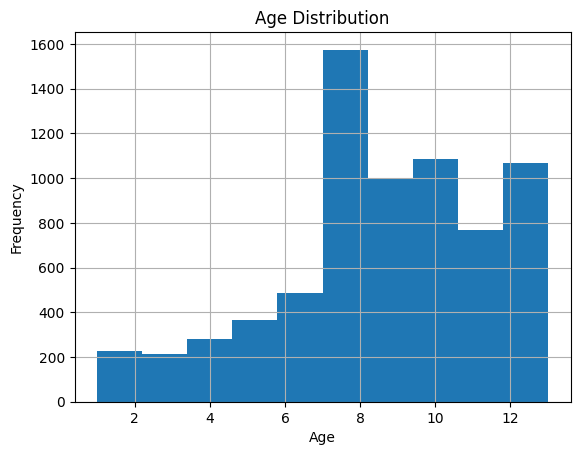

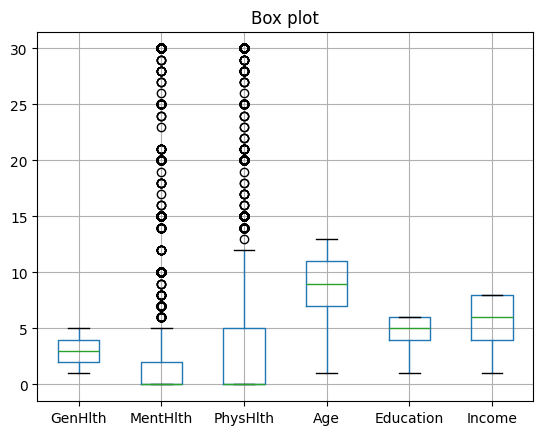

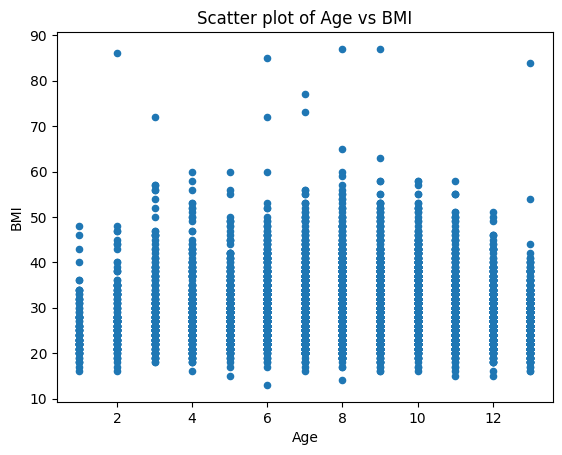

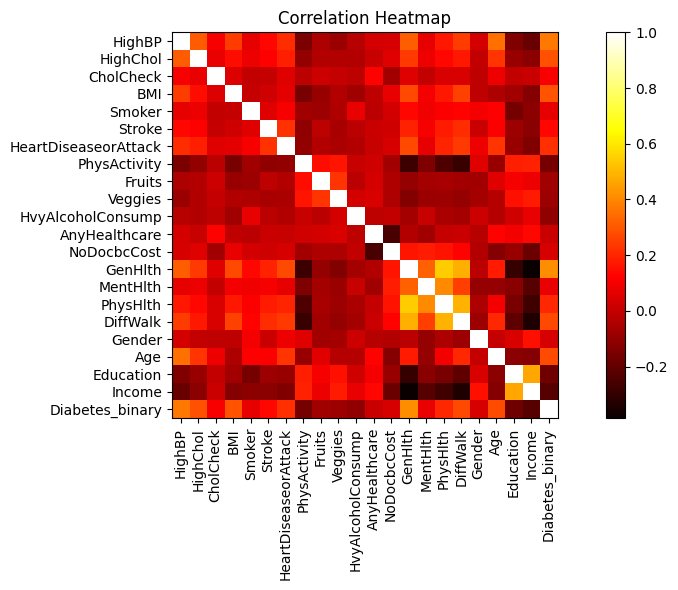

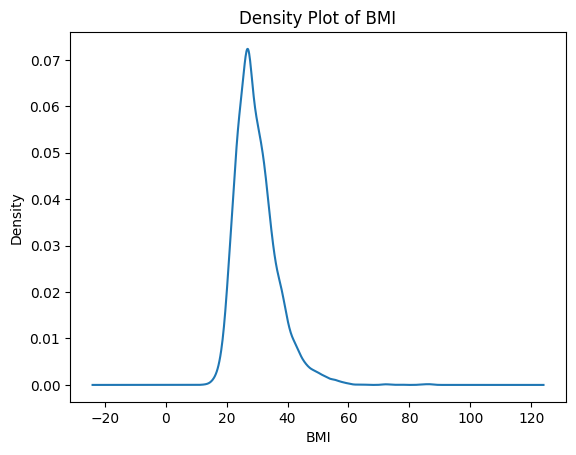

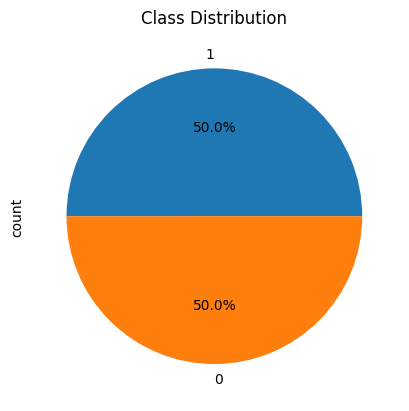

In [14]:
# %load ml06.py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
df = read_csv('data/cdc_diabetes_small.csv')
# Histogram
df['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting boxplots for the features
df.boxplot(column=['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'])
plt.title('Box plot')
plt.show()

# Scatter Plot
df.plot.scatter(x='Age', y='BMI')
plt.title('Scatter plot of Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# Correlation Heatmap
features = df.columns
plt.figure(figsize=(10, 6))
plt.imshow(df.corr(), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(ticks=np.arange(len(features)), labels=features, rotation='vertical')
plt.yticks(ticks=np.arange(len(features)), labels=features)
plt.tight_layout()
plt.show()

# Density Plot
df['BMI'].plot(kind='density')
plt.title('Density Plot of BMI')
plt.xlabel('BMI')
plt.show()

# Pie Chart
df['Diabetes_binary'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('Class Distribution')
plt.show()

In [16]:
# %load ml07.py
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('data/data_cleaning.csv')
print(df)

# Remove duplicated rows
df = df.drop_duplicates()
# Remove duplicated columns
df = df.T.drop_duplicates().T
print(df)

# Mark missing values as NaN
df = df.apply(pd.to_numeric, errors='coerce')
print(df)
print(df.info())

# Remove columns with no variance
variance = df.var()
columns_to_drop = variance[variance == 0].index
df = df.drop(columns=columns_to_drop)
print(df)

# Calculate the number of outliers for each feature
outliers = {}
for column in df.columns[:-1]:  # Excluding the last column (target)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
# Print the number of outliers for each feature
for column in outliers:
    print(f"Feature ‘{column}' has {outliers[column]} outliers")

# Clip outliers
for column in df.columns[:-1]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
print(df)


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6 Feature_7  \
0        5.1        3.5        1.4        0.2          1        2.5       5.1   
1        4.9        3.0        1.4        0.2          1        2.4       4.9   
2        4.7        3.2        1.3        0.2          1        2.6       4.7   
3        4.6        3.1        1.5        0.2          1        2.5       4.6   
4          5        3.6        1.4        0.2          1        2.5         5   
5          x        3.9        1.7        0.4          1        3.0         x   
6        5.4        3.4        1.7        0.3          1        2.8       5.4   
7          5        3.5        1.4        0.2          1        2.5         5   
8        5.2        3.4        NaN        0.2          1        2.7       5.2   
9        5.3        3.5        1.4        0.2          1        2.5       5.3   
10       5.4        3.9        1.7        0.4          1       -5.0       5.4   
11       4.9        3.0     

In [20]:
# %load ml08.py
import pandas as pd
import numpy as np
df = pd.DataFrame({'Age': [17, 23, 0, 38, 54, 67, 32],
                   'Height': [160, 172, 150, 165, 163, 158, 175],
                   'Weight':[50, 68, 43, 52, 47, 49, 0]})
df = df.replace({0: np.nan}) # replace missing value (0) with NaN
print(df)
print(df.isnull().sum())
df = df.dropna(axis=0) # drop rows with NaN
print(df)


    Age  Height  Weight
0  17.0     160    50.0
1  23.0     172    68.0
2   NaN     150    43.0
3  38.0     165    52.0
4  54.0     163    47.0
5  67.0     158    49.0
6  32.0     175     NaN
Age       1
Height    0
Weight    1
dtype: int64
    Age  Height  Weight
0  17.0     160    50.0
1  23.0     172    68.0
3  38.0     165    52.0
4  54.0     163    47.0
5  67.0     158    49.0


In [22]:
# %load ml09.py
import pandas as pd
import numpy as np
df = pd.DataFrame({'Age': [17, 23, 0, 38, 54, 67, 32],
                   'Height': [160, 172, 150, 165, 163, 158, 175],
                   'Weight':[50, 68, 43, 52, 47, 49, 0]})
df = df.replace({0: np.nan})
df['Age'] = df['Age'].fillna(df['Age'].median()) # replace NaN with median
df['Weight'] = df['Weight'].fillna(df['Weight'].mean()) # replace NaN with mean
print(df)


    Age  Height  Weight
0  17.0     160    50.0
1  23.0     172    68.0
2  35.0     150    43.0
3  38.0     165    52.0
4  54.0     163    47.0
5  67.0     158    49.0
6  32.0     175    51.5


In [24]:
# %load ml10.py
# Handling categorical data
import pandas as pd
df = pd.DataFrame({'year':[2015, 2017, 2013, 2018, 2020],
                   'maker':['Toyota', 'Honda', 'Perodua', 'Hyundai', 'Toyota'],
                   'engine':[1.5, 1.8, 1.3, 1.6, 1.8],
                   'review':['moderate', 'good', 'poor', 'moderate', 'good']})
mapping = {'poor':1, 'moderate':2, 'good':3}
df['review'] = df['review'].map(mapping) # encode ordinal data
df = pd.get_dummies(df, columns=['maker']) # encode nominal data
print(df)


   year  engine  review  maker_Honda  maker_Hyundai  maker_Perodua  \
0  2015     1.5       2        False          False          False   
1  2017     1.8       3         True          False          False   
2  2013     1.3       1        False          False           True   
3  2018     1.6       2        False           True          False   
4  2020     1.8       3        False          False          False   

   maker_Toyota  
0          True  
1         False  
2         False  
3         False  
4          True  


In [26]:
# %load ml11.py
# Scale data (between 0 and 1)
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
df = read_csv('data/heights_weights_genders.csv')
# Separate into features and target
X = df.drop(columns=['Gender'])
y = df['Gender']
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
scaledX = scaler.transform(X)
# Check min and max of all column
print(f'minimum={np.min(scaledX, axis=0)}, maximum={np.max(scaledX, axis=0)}')

minimum=[0. 0.], maximum=[1. 1.]


In [30]:
# %load ml12.py
# Standardize data (0 mean, 1 stdev)
import numpy as np
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
df = read_csv('data/heights_weights_genders.csv')
# Separate into features and target
X = df.drop(columns=['Gender'])
y = df['Gender']
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
# Check mean and standard deviation of all columns
print(f'mean={np.mean(scaledX, axis=0)}, variance={np.var(scaledX, axis=0)}')


mean=[ 6.82121026e-16 -4.54747351e-16], variance=[1. 1.]


In [32]:
# %load ml13.py
# Robust scaling (0 median, 1 IQR)
import numpy as np
from sklearn.preprocessing import RobustScaler
from pandas import read_csv
df = read_csv('data/heights_weights_genders.csv')
# Separate into features and target
X = df.drop(columns=['Gender'])
y = df['Gender']
scaler = RobustScaler()
scaledX = scaler.fit_transform(X)
# Check median and IQR of all columns
q3, q1 = np.percentile(scaledX, [75 ,25], axis=0)
print(f'median={np.median(scaledX, axis=0)}, IQR={q3-q1}')

median=[0. 0.], IQR=[1. 1.]


In [34]:
# %load ml14.py
# Create 2 new features
import pandas as pd
df = pd.read_csv('data/heights_weights_genders.csv')
bins = [0, 158, 179, 210] 
labels = ['Short', 'Average', 'Tall']
df['new_feature1'] = pd.cut(df['Height(cm)'], bins=bins, labels=labels)
df['new_feature2'] = df['Weight(kg)'].rolling(window=3).mean()
print(df.head())

   Height(cm)  Weight(kg) Gender new_feature1  new_feature2
0       187.6       109.7   Male         Tall           NaN
1       174.7        73.6   Male      Average           NaN
2       188.2        96.5   Male         Tall     93.266667
3       182.2        99.8   Male         Tall     89.966667
4       177.5        93.6   Male      Average     96.633333
